In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris # 붓꽃 데이터셋
iris = load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
data = iris['data']

In [7]:
feature_names = iris['feature_names']

In [8]:
target = iris['target']

In [10]:
df = pd.DataFrame(data, columns=feature_names)
df['target'] = target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 시각화

In [11]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

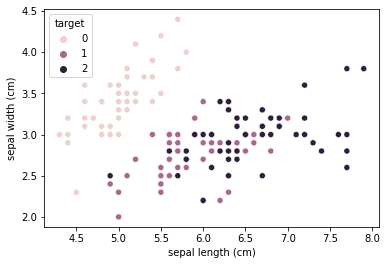

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# 꽃받침
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='target')
plt.show()

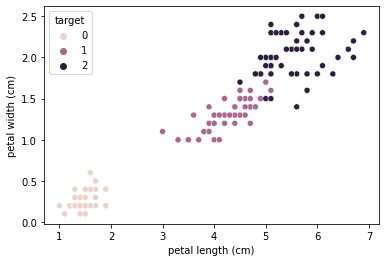

In [15]:
# 꽃잎
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='target')
plt.show()

### 데이터 분리

In [16]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [27]:
from sklearn.model_selection import train_test_split
# 매개변수 : 독립변수, 종속변수
# 리턴값(튜플) : x_train, x_test, y_train, y_test    (헷갈리기 쉬움!!)
x_train, x_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'])

In [28]:
len(x_train), len(x_test), len(y_train), len(y_test)

(112, 38, 112, 38)

In [29]:
150*0.75

112.5

<AxesSubplot:xlabel='target', ylabel='count'>

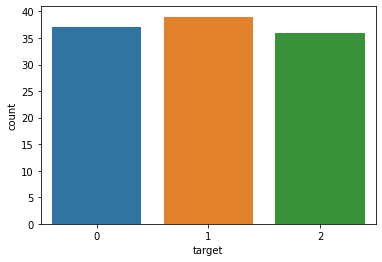

In [30]:
sns.countplot(y_train)

In [42]:
# stratify 옵션
# target(Class) 변수의 값을 균등하게 배분(분류모델에서만 가능, 회귀는 불가)
# random_state 옵션 : 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값
x_train, x_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3, stratify=df['target'], random_state=32)

<AxesSubplot:xlabel='target', ylabel='count'>

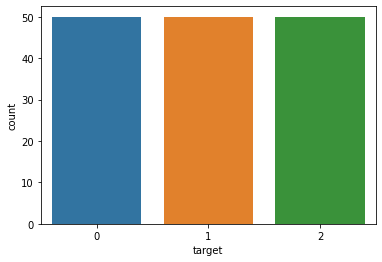

In [43]:
sns.countplot(df['target'])

In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [45]:
pred

array([1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0,
       0, 2, 2, 0, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 2, 0, 0,
       2])

In [46]:
y_test

93     1
43     0
42     0
25     0
11     0
91     1
54     1
9      0
118    2
147    2
61     1
23     0
66     1
68     1
131    2
4      0
70     1
102    2
97     1
117    2
7      0
3      0
1      0
137    2
107    2
5      0
132    2
19     0
130    2
84     1
67     1
94     1
79     1
100    2
135    2
144    2
104    2
99     1
78     1
89     1
24     0
120    2
37     0
17     0
108    2
Name: target, dtype: int32

In [47]:
# 정확도 : Accuracy
(pred == y_test).mean()

0.9777777777777777

### Logistic Regression (로지스틱 회귀)

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
(pred == y_test).mean() # 정확도

0.9777777777777777

In [53]:
pred

array([1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0,
       0, 2, 2, 0, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 2, 0, 0,
       2])

### KNN 최근접이웃

In [68]:
from sklearn.neighbors import KNeighborsClassifier
# n_neighbors 옵션 : k개수
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
pred = model.predict(x_test)
(pred == y_test).mean() # 정확도

0.9777777777777777

In [63]:
pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1])

### SVM (Support Vector Machine)

In [69]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
pred = model.predict(x_test)
(pred == y_test).mean()

0.9777777777777777

In [71]:
model.decision_function(x_test)

array([[-0.15650331,  2.23652144,  0.79697407],
       [ 2.22182358,  1.17839681, -0.25283153],
       [ 2.23332071,  1.11798081, -0.24743955],
       [ 2.22236742,  1.18216673, -0.25413792],
       [ 2.22786457,  1.16580555, -0.25301617],
       [-0.22626002,  2.21434911,  1.07919851],
       [-0.22728748,  2.2117854 ,  1.09538974],
       [ 2.22860118,  1.16621242, -0.2535367 ],
       [-0.20362341,  0.80275226,  2.25039965],
       [-0.2343579 ,  1.10914635,  2.21763216],
       [-0.21784415,  2.22482196,  0.94781792],
       [ 2.21706565,  1.19148263, -0.25428512],
       [-0.22625752,  2.21082714,  1.09388836],
       [-0.23194607,  2.21361176,  1.1116264 ],
       [-0.1978446 ,  0.86362442,  2.22760182],
       [ 2.23445038,  1.15050431, -0.25385823],
       [-0.23123695,  1.17811752,  2.17590319],
       [-0.22678525,  0.89412973,  2.24058403],
       [-0.21838054,  2.22939368,  0.92165528],
       [-0.19745909,  0.82578897,  2.23938564],
       [ 2.23037108,  1.16572444, -0.254

### Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
(pred == y_test).mean()

0.9777777777777777

In [ ]:
'''
gini 지수
1 - (0 개수 / 전체 갯수)**2 - (1 개수 / 전체 갯수)**2 - (2 개수 / 전체 갯수)**2
'''

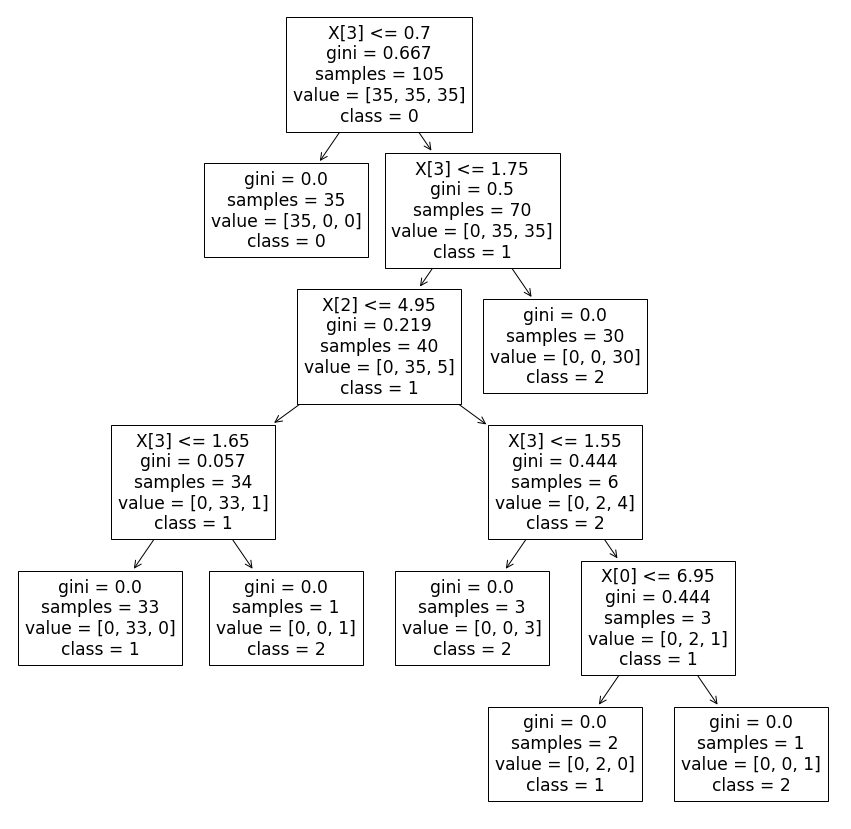

In [75]:
plt.figure(figsize=(15,15))
plot_tree(model, class_names='012')
plt.show()

In [76]:
print(export_text(model))

|--- feature_3 <= 0.70
|   |--- class: 0
|--- feature_3 >  0.70
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- class: 2



### Naive Bayes
* GaussianNB : 정규분포
* BernoulliNB : 베르누이
* MultinormialNB : 다항분포

In [78]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)
(pred == y_test).mean()

0.9777777777777777

In [79]:
# 클래스 종류
model.classes_

array([0, 1, 2])

In [80]:
# 클래스별 개수
model.class_count_

array([35., 35., 35.])

In [82]:
# 클래스 사전확률
model.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

### Perceptron

In [83]:
from sklearn.linear_model import Perceptron
model = Perceptron()
model.fit(x_train, y_train)
pred = model.predict(x_test)
(pred == y_test).mean()

0.7333333333333333

### Neural Network (인공신경망)

In [138]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
(pred == y_test).mean()

0.9090909090909091

In [139]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [140]:
# 0 : 악성, 1 : 양성
data = cancer['data']
target = cancer['target']
feature_names = cancer['feature_names']
df = pd.DataFrame(data, columns=feature_names)
df['target'] = target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [142]:
# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], stratify=df['target'], random_state=32)
len(x_train), len(x_test), len(y_train), len(y_test)

(426, 143, 426, 143)

In [143]:
dt = DecisionTreeClassifier()
svc = SVC()
mlp = MLPClassifier()

In [144]:
model = dt
model.fit(x_train, y_train)
pred = model.predict(x_test)
(pred == y_test).mean()

0.9300699300699301

### Confusion matrix

In [145]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred, y_test) # tn, fp, fn, tp

array([[49,  6],
       [ 4, 84]], dtype=int64)

In [146]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# 정확도(Accuracy)
accuracy_score(pred, y_test)

0.9300699300699301

In [149]:
# 정밀도(precision) TP / (TP+FP)
# T라고 예측한 것 중에서 얼마나 맞았는지
precision_score(pred, y_test), 84/90

(0.9333333333333333, 0.9333333333333333)

In [151]:
# 재현율(recall) TP / (TP+FN)
# 실제 T 중에서 얼마나 맞았는지
recall_score(pred, y_test), 84/88

(0.9545454545454546, 0.9545454545454546)

In [152]:
# F1-score (정밀도와 재현율의 조화평균)
# 2* 정밀도*재현율 / (정밀도+재현율)
from sklearn.metrics import f1_score
f1_score(pred, y_test)

0.9438202247191012

### classification report (분류보고서)

In [153]:
from sklearn.metrics import classification_report
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        55
           1       0.93      0.95      0.94        88

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143



### cross validation (교차 검증)

In [154]:
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier()
# K-fold cross validation
score = cross_val_score(model, df.drop('target', axis=1), df['target'], cv=10) 

In [155]:
score

array([0.92982456, 0.89473684, 0.92982456, 0.89473684, 0.96491228,
       0.87719298, 0.9122807 , 0.94736842, 0.92982456, 0.98214286])

In [156]:
score.mean()

0.9262844611528822